In [1]:
#Description:This program uses an artifical recurrent neural network called LSTM
#predict the closing stock price of a corporation using the past 60day stock price

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
import datetime as dt
import os
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
#stock Price Collection 
stock_ticker='AAPL'
start = pd.to_datetime(['2018-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-03-28']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135746,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128593,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319633,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790062,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634850,82271200
...,...,...,...,...,...,...,...
1061,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
1062,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
1063,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
1064,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400


In [ ]:
#Get the number of rows and column in data
df.shape

(1066, 7)

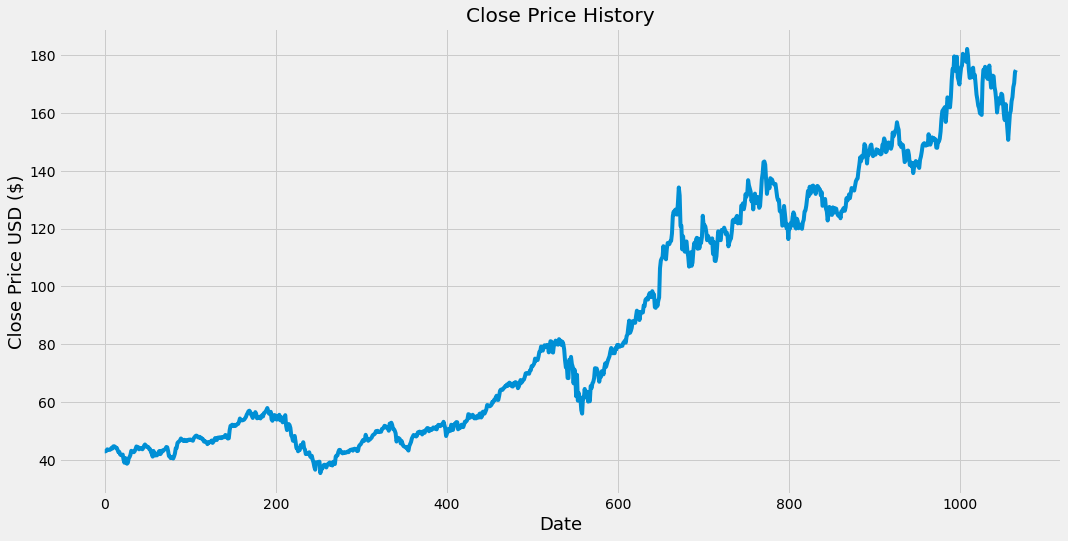

In [ ]:
#Visualise the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


In [ ]:
#Data frame with close only
data=df.filter(['Close'])

dataset=data.values

#Train the model

training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

853

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.91943338],
       [0.94578825],
       [0.95022621]])

In [ ]:
#Trainind data set
train_data=scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()


[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486045, 0.05479216, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06191005, 0.05941794, 0.0594862 ,
       0.05467269, 0.04936417, 0.05004693, 0.04398738, 0.04229751,
       0.04308268, 0.04368012, 0.03125373, 0.02440898, 0.03557224,
       0.02961507, 0.02212168, 0.02427243, 0.03502604, 0.0378083 ,
       0.04298027, 0.05257319, 0.05161729, 0.0506273 , 0.0492959 ,
       0.05173679, 0.05685755, 0.06278057, 0.06179056, 0.06132968,
       0.05600409, 0.05806948, 0.0591107 , 0.05885465, 0.0560553 ,
       0.05931553, 0.06450456, 0.06747461, 0.06448749, 0.06187591,
       0.06223434, 0.061159  , 0.05651618, 0.05641376, 0.04963728,
       0.04550654, 0.03883247, 0.05219766, 0.04463599, 0.04146111])]
[0.04368011786007142]

[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486045, 0.05479216, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06

In [ ]:
#Convert x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(793, 60, 1)

In [ ]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))




In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
793/793 [==============================] - 38s 44ms/step - loss: 0.0022
Epoch 2/10
793/793 [==============================] - 21s 27ms/step - loss: 9.1979e-04
Epoch 3/10
793/793 [==============================] - 22s 27ms/step - loss: 7.0684e-04
Epoch 4/10
793/793 [==============================] - 22s 28ms/step - loss: 6.2579e-04
Epoch 5/10
793/793 [==============================] - 23s 28ms/step - loss: 6.0274e-04
Epoch 6/10
793/793 [==============================] - 22s 28ms/step - loss: 5.2040e-04
Epoch 7/10
793/793 [==============================] - 22s 28ms/step - loss: 4.2779e-04
Epoch 8/10
793/793 [==============================] - 22s 27ms/step - loss: 4.6037e-04
Epoch 9/10
793/793 [==============================] - 22s 27ms/step - loss: 3.7225e-04
Epoch 10/10
793/793 [==============================] - 22s 28ms/step - loss: 3.0319e-04


In [ ]:
#Create the testing data set
#a new array coontaingn scaled values from indexs
test_data=scaled_data[training_data_len-60:,:]

# create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
#convert the data to a  numpy  array to use in the LSTM model
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#evaluate the model(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.949532223119315

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


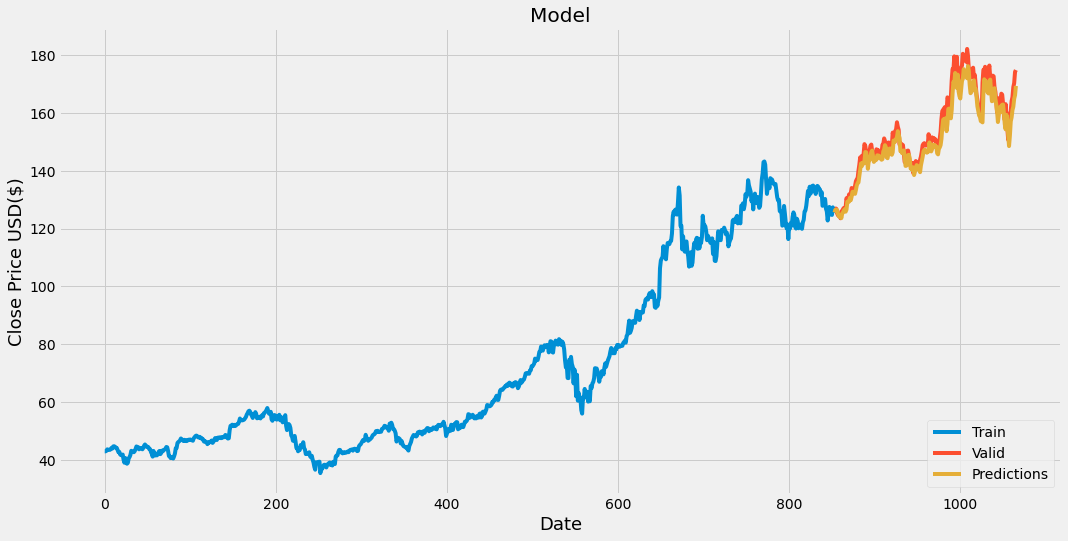

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted price
valid

,Close,Predictions
853,127.099998,125.525230
854,126.900002,126.461716
855,126.849998,126.541245
856,125.279999,126.429955
857,124.610001,125.118294
...,...,...
1061,165.380005,160.925888
1062,168.820007,162.057938
1063,170.210007,164.796448
1064,174.070007,166.023071


In [ ]:
#get the quote 
stock_ticker='AAPL'
start = pd.to_datetime(['2018-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-03-28']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
applestock = pd.read_csv(url)

#create the dataframe
new_df=applestock.filter(['Close'])

# Get the last 60 days price value and convert the dataframe to array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)

#create the empty list
X_test=[]

#append the past 60 days 
X_test.append(last_60_days_scaled)

#convert the X_test data set to a numpy array
X_test=np.array(X_test)

#reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#get predicte price scale
pred_price=model.predict(X_test)

#undo the scaling
pred_price=scaler.inverse_transform(pred_price)

print(pred_price)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


[[169.84436]]


In [ ]:
stock_ticker='AAPL'
start = pd.to_datetime(['2022-04-20']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-20']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
applestock1 = pd.read_csv(url)
print(applestock1['Close'])

0    167.399994
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
